In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [3]:
df = df.iloc[:, 2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
238,46,82000,0
239,53,143000,1
189,28,32000,0
174,34,72000,0
28,29,43000,0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                      df['Purchased'],
                                                      test_size = 0.2,
                                                      random_state=0)
                                                    
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # z = X^i – (μ / σ)    mean = 0 and standard deviation = 1

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.sample(10)

,Age,EstimatedSalary
44,0.464789,1.218909
19,-0.312897,-1.388577
33,-0.118476,-0.490443
13,0.075946,0.204887
60,-0.604529,-1.504465
39,1.048053,-0.982968
75,-1.965480,0.349747
7,-0.215686,2.146016
27,-0.896162,0.291803
32,1.825739,-0.287638


In [8]:
X_train.describe()

,Age,EstimatedSalary
count,320.00000,320.000000
mean,38.21875,69928.125000
std,10.30304,34570.057299
min,18.00000,15000.000000
25%,30.00000,43000.000000
50%,38.00000,69500.000000
75%,46.00000,88000.000000
max,60.00000,150000.000000


In [9]:
np.round(X_train_scaled.describe(),4)

,Age,EstimatedSalary
count,320.0000,320.0000
mean,0.0000,0.0000
std,1.0016,1.0016
min,-1.9655,-1.5914
25%,-0.7990,-0.7802
50%,-0.0213,-0.0124
75%,0.7564,0.5236
max,2.1174,2.3198


# Some charts to show the effect of Standard scaling

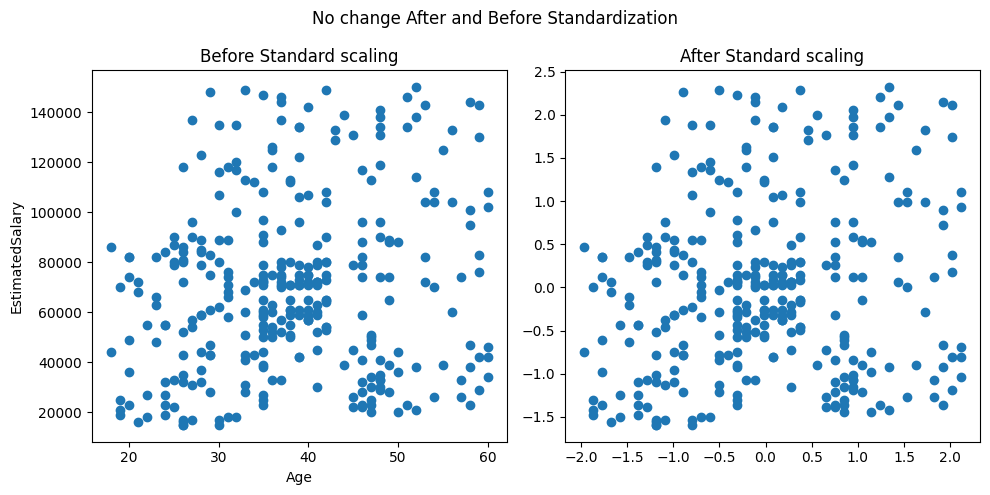

In [10]:
figures , axis  = plt.subplots(1,2, figsize=[10,5])

# before Standard scaling
axis[0].scatter(X_train['Age'], X_train['EstimatedSalary'])
axis[0].set_title("Before Standard scaling")
axis[0].set_xlabel("Age")
axis[0].set_ylabel("EstimatedSalary")

# before Standard scaling
axis[1].scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
axis[1].set_title('After Standard scaling')
axis[0].set_xlabel("Age")
axis[0].set_ylabel("EstimatedSalary")

plt.suptitle('No change After and Before Standardization')

# Adjust layout and display the plot
plt.tight_layout()
plt.show() 

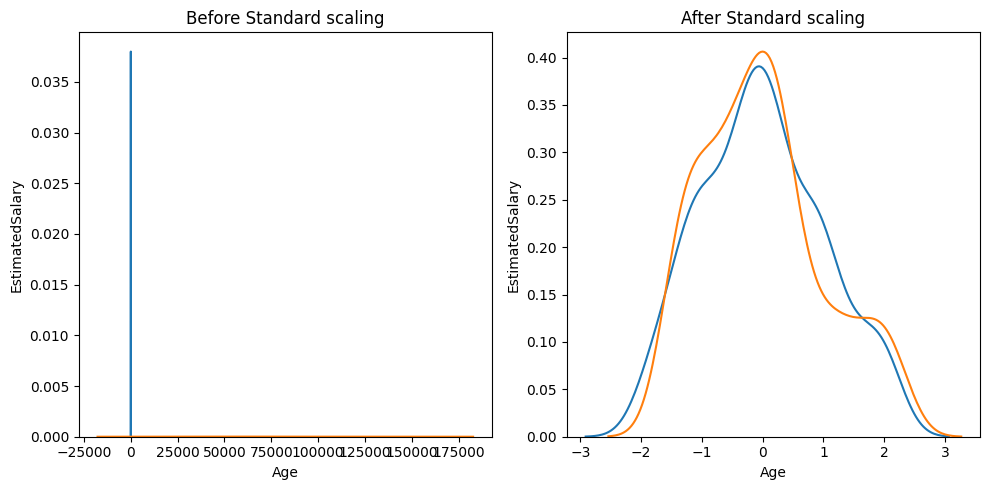

In [11]:
figures , (ax1,ax2)  = plt.subplots(ncols=2, figsize=[10,5])

# before Standard scaling
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_title("Before Standard scaling")
ax1.set_xlabel("Age")
ax1.set_ylabel("EstimatedSalary")


# before Standard scaling
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, )
ax2.set_title('After Standard scaling')
ax2.set_xlabel("Age")
ax2.set_ylabel("EstimatedSalary")

# Adjust layout and display the plot
plt.tight_layout()
plt.show() 

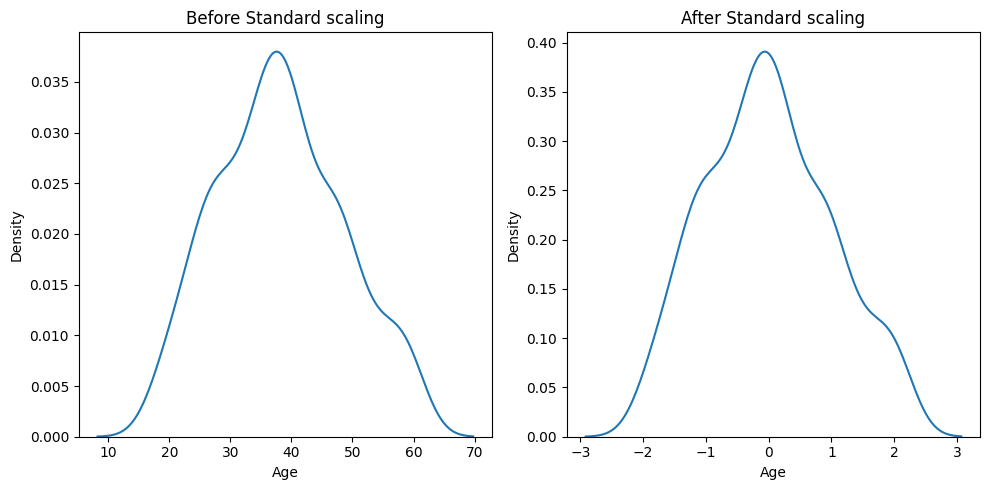

In [12]:
figures , (ax1,ax2)  = plt.subplots(ncols=2, figsize=[10,5])

# before Standard scaling
sns.kdeplot(X_train['Age'], ax=ax1)
ax1.set_title("Before Standard scaling")
ax1.set_xlabel("Age")


# before Standard scaling
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
ax2.set_title('After Standard scaling')
ax2.set_xlabel("Age")


# Adjust layout and display the plot
plt.tight_layout()
plt.show() 

# Some effects of Standard scaling on different algorithms

### Why for LogisticRegression we do scaling?

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [15]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [17]:
y_predict = lr.predict(X_test)
y_predict_scaled = lr_scaled.predict(X_test_scaled)

### These below accuracy test shows that scaling is very in LogisticRegression

In [18]:
print("The accuracy before scaling", accuracy_score(y_test,y_predict))
print("The accuracy after scaling", accuracy_score(y_test,y_predict_scaled))

print("The balanced accuracy before scaling", balanced_accuracy_score(y_test,y_predict))
print("The balanced accuracy after scaling", balanced_accuracy_score(y_test,y_predict_scaled))

The accuracy before scaling 0.725
The accuracy after scaling 0.925
The balanced accuracy before scaling 0.5
The balanced accuracy after scaling 0.8777429467084639
